# Introduction

The goal of this project is to analyze aircraft accident data to identify the safest aircraft models for purchase. This analysis will examine accident trends, the impact of weather conditions, and the riskiest flight phases. By uncovering key risk factors, we aim to provide data-driven recommendations to minimize operational risks and ensure a smart investment in aviation

# Data importation

In [1]:
#importing the libraries that will use in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset to the notebook
df = pd.read_csv("AviationData.csv",encoding="latin1",low_memory=False)
#output the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#output the last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
#Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Get summary statistics for columns in the dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
#check for duplicates 
df.duplicated().sum()

0

In [7]:
# Count the occurrences of each aircraft make to identify the most common ones
df['Make'].value_counts()  

Cessna                    22227
Piper                     12029
CESSNA                     4922
Beech                      4330
PIPER                      2841
                          ...  
Druckman                      1
GLOS WALLIS RICHARD JR        1
Gippsland                     1
SCHAUER WILLIAM A JR          1
Wells/rand                    1
Name: Make, Length: 8237, dtype: int64

In [8]:
# Checking unique values in the 'Weather.Condition' column
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

# Data Cleaning

In [9]:
#check for null values
df.isna()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [10]:
#Return total number of null values in the dataset
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [11]:
# Drop columns that contain Most NaN values and I won't need them
df= df.drop(columns=['Investigation.Type','Accident.Number','Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier','Report.Status' ])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Registration.Number     87572 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81812 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

In [13]:
df.isna().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Publication.Date          13771
dtype: int64

In [14]:
# Drop rows where 'Make' or 'Model' is missing
df = df.dropna(subset=['Make', 'Model'])

In [15]:
 #Fill categorical columns with "Unknown"
fill_unknown_cols = ['Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 
                     'Amateur.Built', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight']

df.loc[:, fill_unknown_cols] = df[fill_unknown_cols].fillna('Unknown')

In [16]:
#Fill numerical injury-related columns with 0
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_cols] = df[injury_cols].fillna(0)

In [17]:
# Fill 'Number.of.Engines' with mode  
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0])

In [18]:
#check for null values
df.isnull().sum()

Event.Id                      0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number           0
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Publication.Date          13765
dtype: int64

In [19]:
#drop the publication column since we don't need it
df = df.drop(columns=['Publication.Date'])

In [20]:
 #convert all "make" to uppercase to avoid duplicate
df['Make'] = df['Make'].str.upper()

In [24]:
#Standardize values in weather.Condition to remove inconsistencies
df['Weather.Condition'] = df['Weather.Condition'].replace({'UNK': 'UNKNOWN', 'Unk': 'UNKNOWN'})

In [26]:
#Standardize them all to uppercase "UNKNOWN":
df['Weather.Condition'] = df['Weather.Condition'].str.upper()

In [27]:
# Checking unique values in the 'Weather.Condition' column
df['Weather.Condition'].unique()

array(['UNKNOWN', 'IMC', 'VMC'], dtype=object)

In [47]:
# Convert dates and extract year/month
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month

# Data Visualisation

1.Top 10 Most Accident-Prone Aircraft Make

To identify which aircraft models are involved in the most accidents.

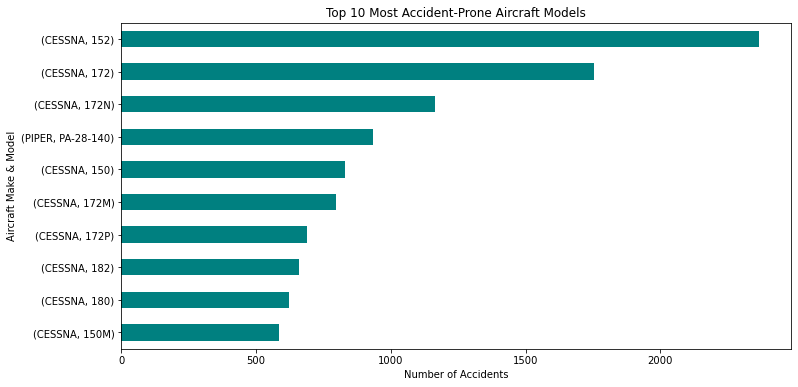

In [53]:
# Count accidents by Make & Model
plt.figure(figsize=(12, 6))
# Get the top 10 aircraft manufacturers with the most accidents
top_accident_models = df.groupby(['Make','Model']).size().nlargest(10)
top_accident_models.plot(kind='barh', color='teal')
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Make & Model")
plt.title("Top 10 Most Accident-Prone Aircraft Models")
# Ensures the most accident-prone model is at the top
plt.gca().invert_yaxis() 
plt.show()

2. Weather Conditions Impact on Accidents 

To check if poor weather conditions increase accident risks.

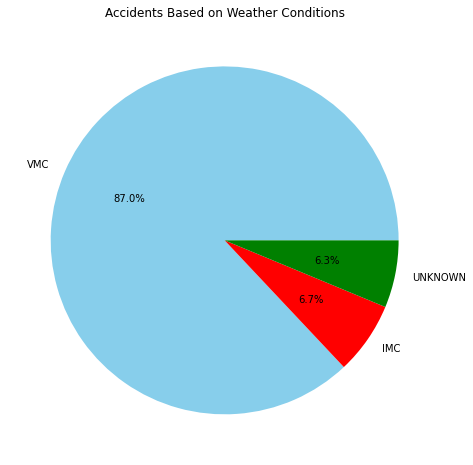

In [54]:
# Count the number of accidents under each weather condition
weather_impact = df['Weather.Condition'].value_counts()
# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(weather_impact, labels=weather_impact.index, autopct='%1.1f%%', colors=["skyblue", "red", "green", "gray"])
plt.title("Accidents Based on Weather Conditions")
plt.show()

3. Riskiest Flight Phase

To identify which flight phases (e.g., takeoff, landing) are the most accident-prone.

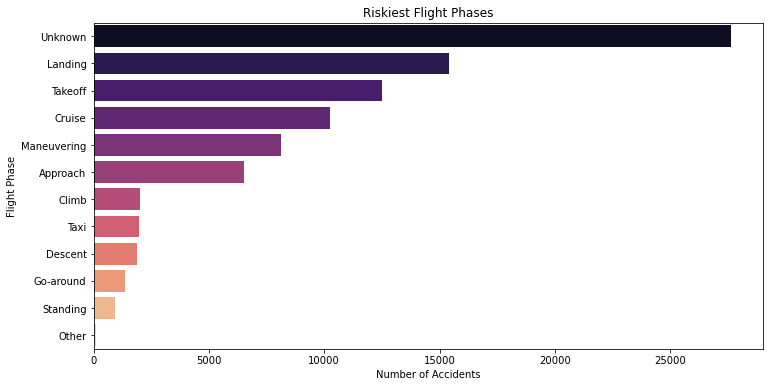

In [62]:
# Count occurrences of each flight phase
flight_phase_impact = df['Broad.phase.of.flight'].value_counts()
# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=flight_phase_impact.values, y=flight_phase_impact.index, palette="magma")
plt.xlabel("Number of Accidents")
plt.ylabel("Flight Phase")
plt.title("Riskiest Flight Phases")
plt.show()

4.Yearly trend

To see how aircraft accidents have changed over the years and identify any trends.

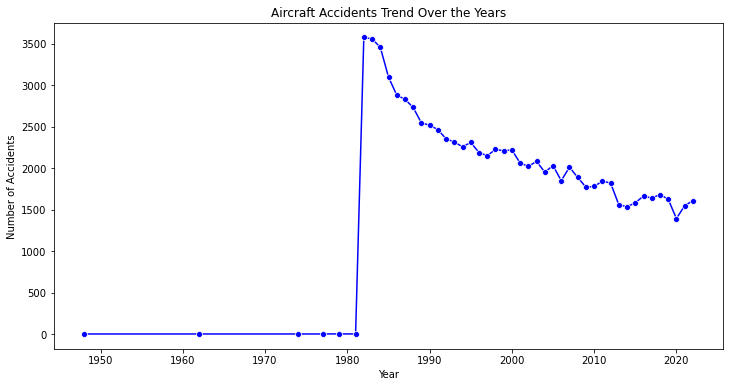

In [64]:
# Count the number of accidents per year and sort by year
yearly_accidents = df['Year'].value_counts().sort_index()
# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aircraft Accidents Trend Over the Years")
plt.show()

# 5.Monthly trend

To identify if accidents are more common in specific months, which could indicate seasonal effects.

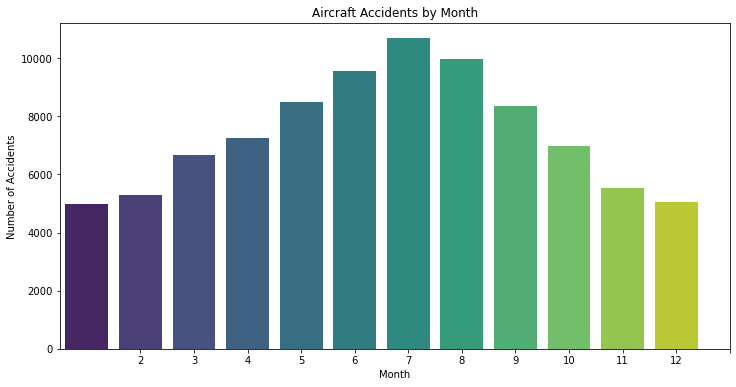

In [63]:
# Count the number of accidents per month and sort by month
monthly_accidents = df['Month'].value_counts().sort_index()
# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_accidents.index, y=monthly_accidents.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.title("Aircraft Accidents by Month")
plt.xticks(range(1, 13))
plt.show()


# Conclusion

1.Aircraft Make and Model Risk: Certain aircraft makes, such as (Cessna 152) and (PiperPA-28-140),have been involved in a high number of accidents. While this may be due to their widespread use,models with lower accident-per-production ratios should be prioritized for purchase.

2.Weather and Operational Conditions: A significant number of accidents occurred under VMC (Visual Meteorological Conditions), indicating that pilot error plays a major role in accidents. Aircraft equipped with advanced safety features, automation, and better pilot-assist technology should be prioritized.

3.Riskiest Flight Phases:Takeoff and Landing are the most dangerous phases. Aircraft with enhanced stability, automated landing aids are recommended to minimize risk.

In [70]:
df.to_csv('aircraft_accidents_cleaned.csv', index=False)